1. Importação de Bibliotecas
O código começa importando várias bibliotecas necessárias:

serial: Para comunicação com dispositivos via porta serial.
time: Para trabalhar com tempo e intervalos.
numpy e pandas: Para manipulação de dados numéricos e tabulares.
matplotlib.pyplot: Para criar gráficos.
prettytable: Para exibir dados em formato de tabela no terminal.

In [ ]:
import serial
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm  # Barra de progresso
import seaborn as sns

2. Configuração Inicial
O código define algumas configurações:

port: Define a porta serial que será usada para comunicação com o Arduino (ajustável conforme o sistema).
baud_rate: Define a taxa de transmissão de dados entre o Arduino e o computador.
duration: Tempo total de coleta de dados (60 segundos).
interval: Intervalo entre leituras (1 segundo).

In [ ]:
# Configuração da porta serial (ajuste conforme necessário)
port = '/dev/ttyACM2'  # Porta do Arduino
baud_rate = 9600  # Taxa de Baud
duration = 60  # Tempo de coleta (1 minuto)
interval = 1  # Intervalo entre coletas (1 segundo)

3. Inicialização da Conexão Serial
A conexão serial com o Arduino é inicializada:

In [ ]:
# Inicializa a conexão serial
ser = serial.Serial(port, baud_rate)
time.sleep(2)  # Aguarda a inicialização da comunicação serial

A função serial.Serial abre a porta serial.
time.sleep(2) aguarda 2 segundos para garantir que a comunicação esteja estável antes de começar.

4. Inicialização de Listas para Dados
Listas são criadas para armazenar os dados recebidos:

In [ ]:
# Lista para armazenar os dados
timestamps = []
temperatures = []
humidities = []
pressures = []
acc_x_values = []
acc_y_values = []
acc_z_values = []
gyro_x_values = []
gyro_y_values = []
gyro_z_values = []
mag_x_values = []
mag_y_values = []
mag_z_values = []

5. Loop de Coleta de Dados
O código entra em um loop que dura o tempo definido em duration (1 minuto). Durante este período:
Lê dados da porta serial:

line = ser.readline().decode('utf-8').strip()
Cada linha recebida do Arduino é lida, decodificada (de bytes para string), e espaços extras são removidos.

Processa os dados recebidos: Com base no conteúdo da linha, o código identifica o tipo de dado e extrai seu valor:


if line.startswith("Timestamp"):
    timestamp = float(line.split(': ')[1].strip().replace(' s', ''))
elif line.startswith("Temperatura"):
    temperature = float(line.split(': ')[1].strip().replace(' ºC', ''))

Cada dado é convertido para um tipo apropriado (ex.: float) e armazenado em variáveis temporárias.

Armazena os dados completos: Quando todas as leituras esperadas estão disponíveis, os valores são adicionados às listas correspondentes:

if None not in [timestamp, temperature, ...]:
    timestamps.append(timestamp)
    temperatures.append(temperature)
  
Intervalo entre leituras: Após processar os dados, o código aguarda 1 segundo antes de começar uma nova leitura.

O trecho de código adiciona uma barra de progresso visual com a biblioteca tqdm para acompanhar o progresso da coleta de dados ao longo do tempo definido (por exemplo, 60 segundos). A barra é configurada com o total igual à duração da coleta, uma descrição informativa ("Coletando Dados"), a unidade de tempo em segundos, e uma largura ajustada para o terminal. Durante o loop, que itera uma vez por segundo, variáveis temporárias para os diferentes tipos de dados (como temperatura, umidade, aceleração, etc.) são inicializadas para armazenar as leituras daquele momento. A barra de progresso é automaticamente atualizada a cada iteração, permitindo ao usuário visualizar em tempo real quanto tempo resta para a conclusão do processo. Isso melhora a experiência do usuário ao indicar que o programa está operando corretamente.

In [ ]:
# Coleta dados por 1 minuto (60 segundos)
start_time = time.time()

# Barra de progresso
with tqdm(total=duration, desc="Coletando Dados", unit="s", ncols=100) as pbar:
    for _ in range(duration):
        timestamp = None
        temperature = None
        humidity = None
        pressure = None
        acc_x = None
        acc_y = None
        acc_z = None
        gyro_x = None
        gyro_y = None
        gyro_z = None
        mag_x = None
        mag_y = None
        mag_z = None
        
        # Armazena os dados temporários durante 1 segundo
        end_time = time.time() + interval  # Define o tempo final para 1 segundo
        while time.time() < end_time:
            line = ser.readline().decode('utf-8').strip()
            
            # Processa a linha de acordo com o tipo de dado
            if line.startswith("Timestamp"):
                timestamp = float(line.split(': ')[1].strip().replace(' s', ''))  # Remove 's' do timestamp
            elif line.startswith("Temperatura"):
                temperature = float(line.split(': ')[1].strip().replace(' ºC', ''))
            elif line.startswith("Umidade"):
                humidity = float(line.split(': ')[1].strip().replace(' %', ''))
            elif line.startswith("Pressão"):
                pressure = float(line.split(': ')[1].strip().replace(' hPa', ''))
            elif line.startswith("Aceleração X"):
                acc_x = float(line.split(': ')[1].strip().replace(' m/s²', ''))
            elif line.startswith("Aceleração Y"):
                acc_y = float(line.split(': ')[1].strip().replace(' m/s²', ''))
            elif line.startswith("Aceleração Z"):
                acc_z = float(line.split(': ')[1].strip().replace(' m/s²', ''))
            elif line.startswith("Giroscópio X"):
                gyro_x = float(line.split(': ')[1].strip().replace(' º/s', ''))
            elif line.startswith("Giroscópio Y"):
                gyro_y = float(line.split(': ')[1].strip().replace(' º/s', ''))
            elif line.startswith("Giroscópio Z"):
                gyro_z = float(line.split(': ')[1].strip().replace(' º/s', ''))
            elif line.startswith("Magnetômetro X"):
                mag_x = float(line.split(': ')[1].strip().replace(' µT', ''))
            elif line.startswith("Magnetômetro Y"):
                mag_y = float(line.split(': ')[1].strip().replace(' µT', ''))
            elif line.startswith("Magnetômetro Z"):
                mag_z = float(line.split(': ')[1].strip().replace(' µT', ''))
        
        # Quando todos os dados de um conjunto estão presentes, salva no CSV
        if None not in [timestamp, temperature, humidity, pressure, acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z, mag_x, mag_y, mag_z]:
            # Armazena os dados
            timestamps.append(timestamp)
            temperatures.append(temperature)
            humidities.append(humidity)
            pressures.append(pressure)
            acc_x_values.append(acc_x)
            acc_y_values.append(acc_y)
            acc_z_values.append(acc_z)
            gyro_x_values.append(gyro_x)
            gyro_y_values.append(gyro_y)
            gyro_z_values.append(gyro_z)
            mag_x_values.append(mag_x)
            mag_y_values.append(mag_y)
            mag_z_values.append(mag_z)
        
        pbar.update(1)  # Atualiza a barra de progresso a cada segundo

6. Finalização da Conexão
Após o término do período de coleta, a conexão serial é fechada:

In [ ]:
 # Fecha a conexão serial
    ser.close()

7. Criação de um DataFrame
Os dados armazenados nas listas são organizados em um DataFrame do Pandas:

In [ ]:
# Cria um DataFrame com os dados
data = {
    'Timestamp': timestamps,
    'Temperature (C)': temperatures,
    'Humidity (%)': humidities,
    'Pressure (hPa)': pressures,
    'Acc X': acc_x_values,
    'Acc Y': acc_y_values,
    'Acc Z': acc_z_values,
    'Gyro X': gyro_x_values,
    'Gyro Y': gyro_y_values,
    'Gyro Z': gyro_z_values,
    'Mag X': mag_x_values,
    'Mag Y': mag_y_values,
    'Mag Z': mag_z_values
}
df = pd.DataFrame(data)

# Verifique se os dados de pressão e aceleração estão no DataFrame
print("Verificando os primeiros dados do DataFrame:")
print(df.head())  # Verificar se os dados estão presentes e corretos

# Remove qualquer linha com dados ausentes (NaN)
df = df.dropna()

O código verifica se os dados de pressão e aceleração (e outros) estão presentes no DataFrame, exibindo as primeiras linhas com df.head(). Em seguida, remove quaisquer linhas contendo valores ausentes (NaN) usando df.dropna(), garantindo que apenas registros completos permaneçam no DataFrame para análise.
O DataFrame facilita a manipulação e visualização dos dados em formato tabular.

8. Salvamento dos Dados em CSV
Isso permite que os dados sejam analisados posteriormente com ferramentas externas.

In [ ]:
# Salva os dados em um arquivo CSV
df.to_csv('sensor_data.csv', index=False)

9. Criação de Gráficos
O código gera gráficos para visualizar os dados coletados:

Cada subplot exibe um tipo de dado (temperatura, umidade, etc.).
O eixo X é sempre o tempo (Timestamp).
Alguns gráficos (como aceleração, giroscópio e magnetômetro) mostram múltiplas variáveis no mesmo gráfico com uma legenda.
Gráficos das Grandezas em Função do Tempo
Esses gráficos mostram como as variáveis mudam ao longo do tempo, com o eixo X representando o tempo (Timestamp) e o eixo Y representando a variável correspondente.

Temperatura em função do Tempo:

Exibe a variação da temperatura (Temperature (C)) ao longo do tempo. Útil para analisar tendências ou instabilidades térmicas.
Umidade em função do Tempo:

Mostra como a umidade relativa do ar (Humidity (%)) evolui ao longo do tempo. Ajuda a identificar variações ambientais.
Pressão em função do Tempo:

Representa a mudança na pressão atmosférica (Pressure (hPa)) ao longo do tempo, indicando alterações climáticas ou de altitude.
Aceleração X em função do Tempo:

Exibe a variação da aceleração no eixo X (Acc X), que pode indicar movimento ou vibração em uma direção específica.
Aceleração Z em função do Tempo:

Mostra as mudanças na aceleração no eixo Z (Acc Z), refletindo forças verticais ou movimentos associados.
Magnetômetro X em função do Tempo:

Representa a variação do campo magnético no eixo X (Mag X), útil para detectar mudanças no ambiente magnético.

Histogramas das Variáveis
Esses gráficos ilustram a distribuição de frequência de cada variável, ajudando a entender como os valores estão distribuídos e se seguem padrões específicos.

Distribuição da Temperatura:

Mostra como os valores de temperatura estão distribuídos em bins (intervalos), revelando padrões como normalidade ou valores extremos.
Distribuição da Umidade:

Exibe a frequência dos valores de umidade. Útil para identificar se os dados estão concentrados em um intervalo específico.
Distribuição da Pressão:

Apresenta a variação da pressão em bins, mostrando se os valores estão uniformes ou possuem picos.
Distribuição da Aceleração X:

Representa a frequência dos valores de aceleração no eixo X, útil para identificar vibrações dominantes.
Distribuição da Aceleração Z:

Mostra os valores de aceleração no eixo Z, ajudando a identificar forças verticais específicas.
Distribuição do Magnetômetro X:

Exibe a frequência dos valores do campo magnético no eixo X, revelando alterações magnéticas.


Matriz de Correlação entre Variáveis
O gráfico de calor (heatmap) da matriz de correlação mostra as relações entre as variáveis:

Cores: Representam o nível de correlação (valores entre -1 e 1). Vermelho indica correlação negativa, azul forte indica correlação positiva, e tons neutros indicam pouca ou nenhuma correlação.
Números: Mostram o coeficiente de correlação entre duas variáveis.
Interpretação: Ajuda a identificar relações significativas entre variáveis, como se uma aceleração está correlacionada com uma mudança na pressão ou temperatura.

Coletando Dados: 100%|███████████████████████████████████████████████| 60/60 [01:06<00:00,  1.10s/s]


Verificando os primeiros dados do DataFrame:
   Timestamp  Temperature (C)  Humidity (%)  Pressure (hPa)  Acc X  Acc Y  \
0    1347.87            18.49         72.00           99.13   0.01   0.08   
1    1348.87            18.50         72.06           99.13   0.12   0.43   
2    1349.87            18.49         72.09           99.13   0.38   0.08   
3    1350.87            18.49         72.17           99.13   0.79   0.54   
4    1351.87            18.50         72.25           99.13   0.94   0.44   

   Acc Z  Gyro X  Gyro Y  Gyro Z  Mag X  Mag Y  Mag Z  
0   1.00    4.64   -2.08   -1.89   39.0  100.0 -113.0  
1   1.00   58.59    0.12   15.08   56.0   92.0 -114.0  
2   1.35   50.72  111.08    2.32   42.0   89.0 -121.0  
3   0.40   13.79  141.78   47.79   39.0   79.0 -156.0  
4  -1.08   59.20    4.15   28.87   63.0   92.0 -182.0  
Estatísticas Descritivas:
         Timestamp  Temperature (C)  Humidity (%)  Pressure (hPa)      Acc X  \
count    60.000000        60.000000     60.000000 

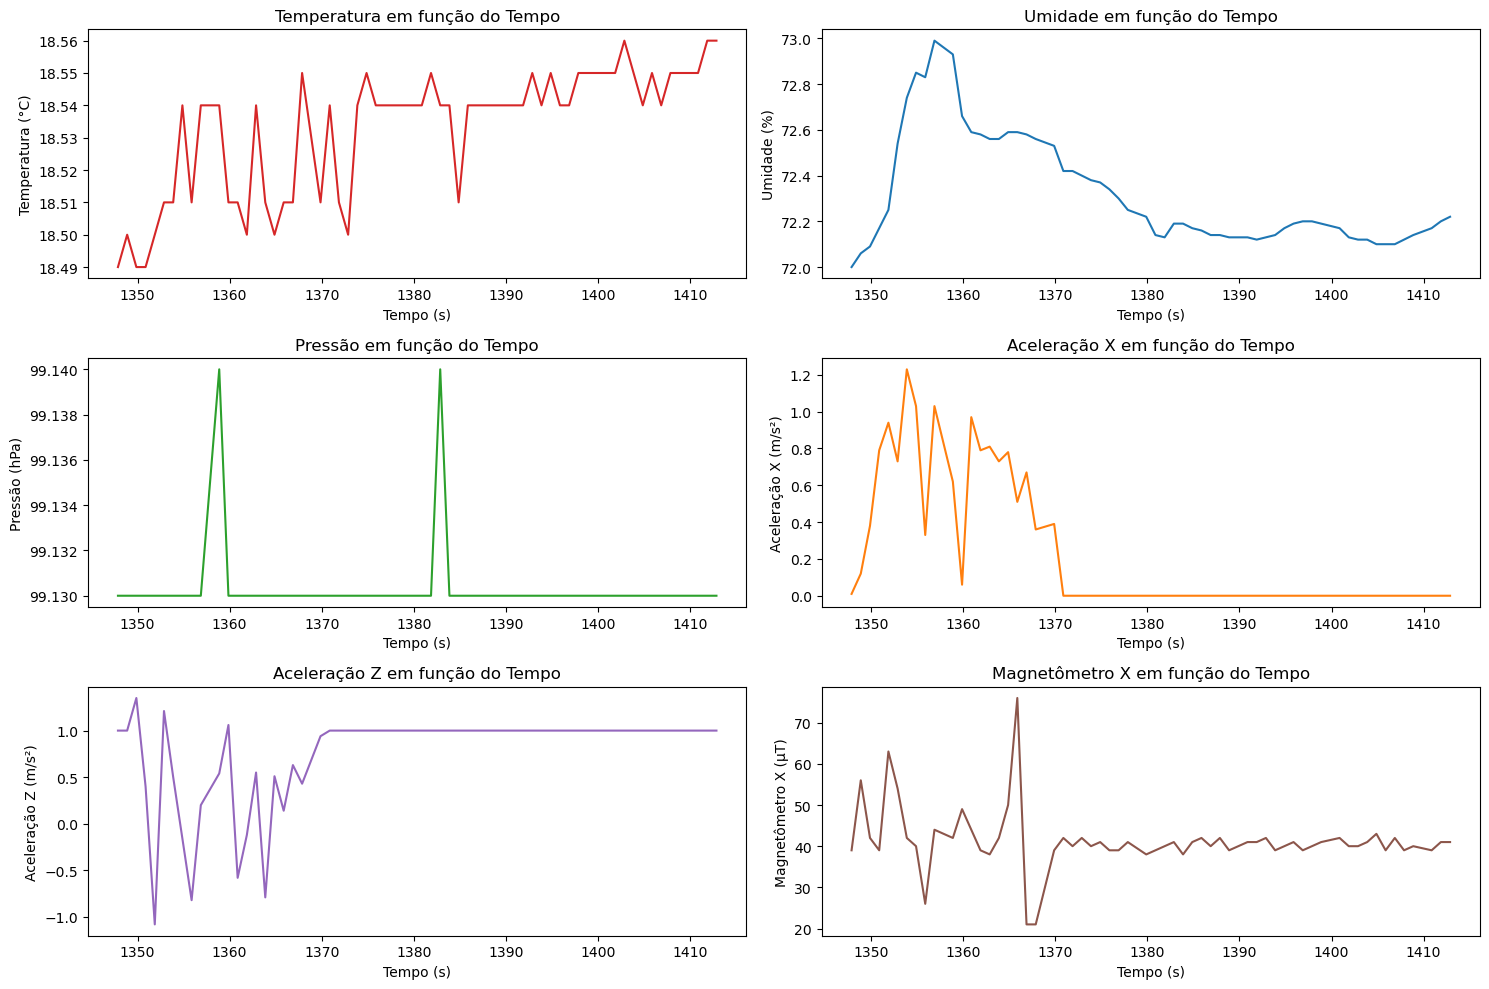

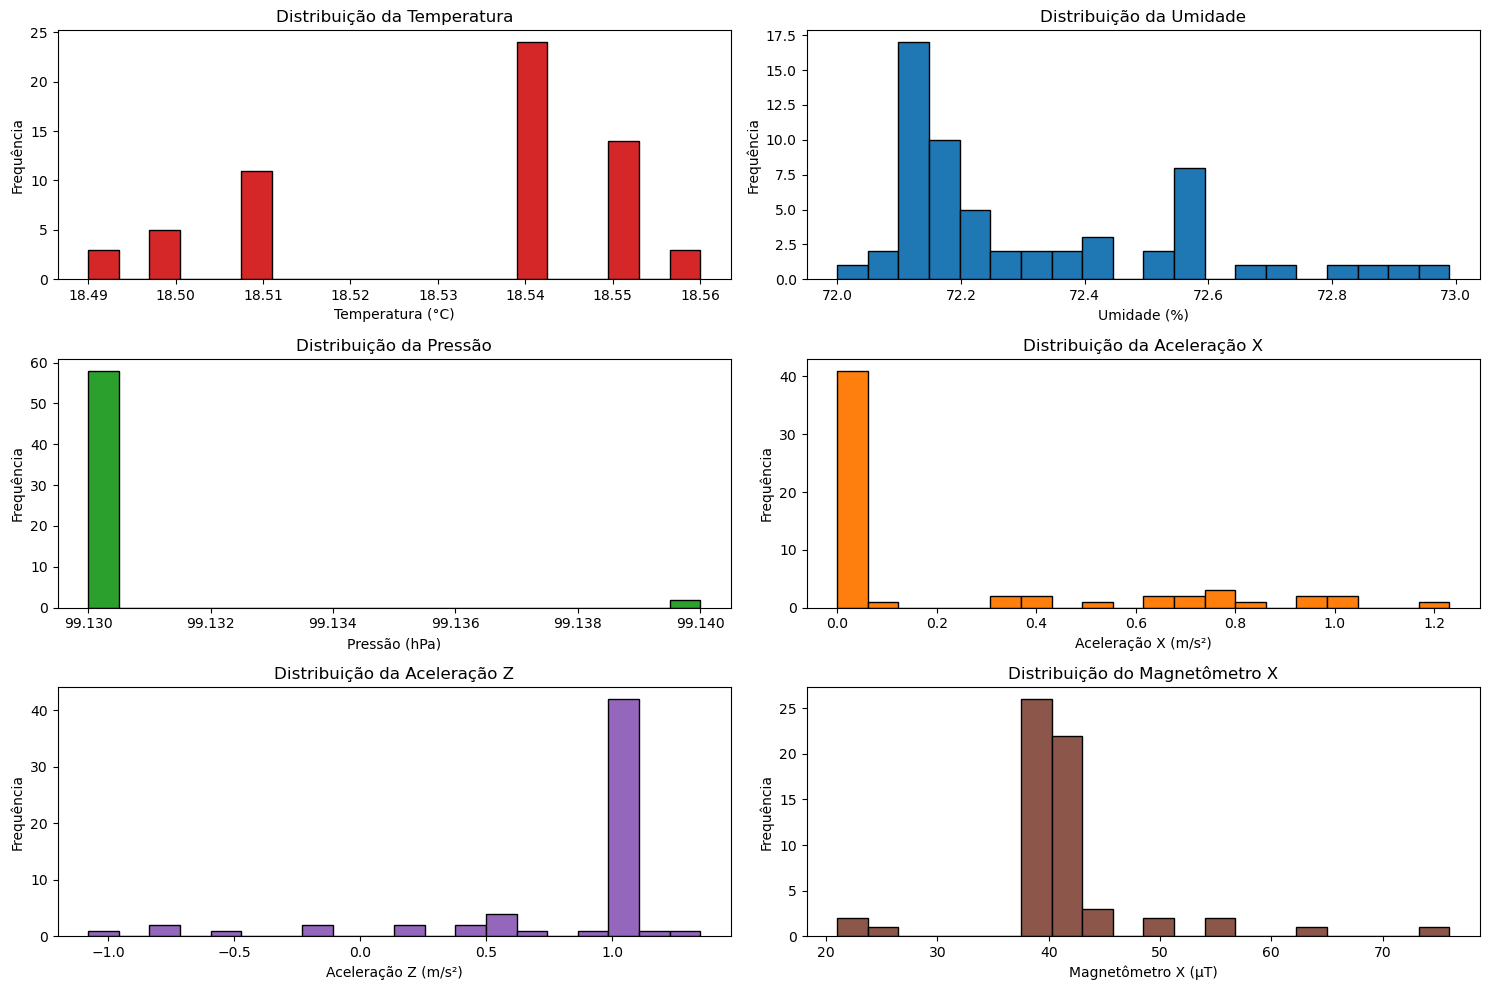

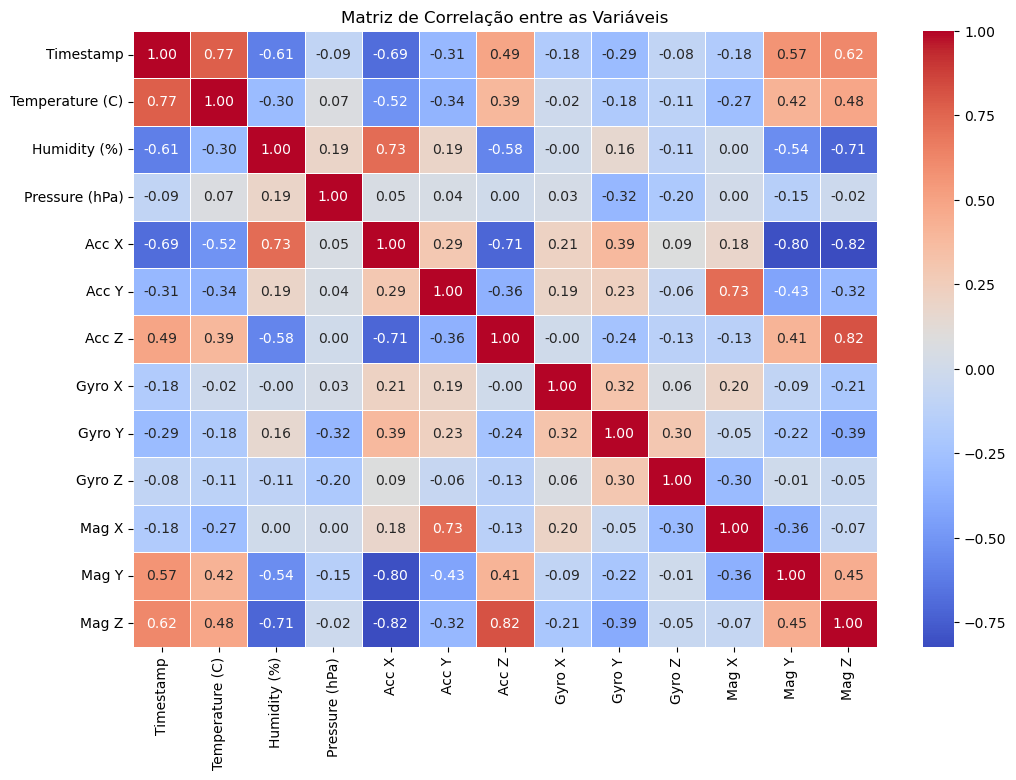

In [20]:
# **Processamento dos dados adquiridos: Estatística descritiva**
statistics = df.describe()

# Exibe a estatística descritiva
print("Estatísticas Descritivas:")
print(statistics)

# **Gráficos das grandezas em função do tempo**
plt.figure(figsize=(15, 10))

# Temperatura
plt.subplot(3, 2, 1)
plt.plot(df['Timestamp'], df['Temperature (C)'], color='tab:red')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura em função do Tempo')

# Umidade
plt.subplot(3, 2, 2)
plt.plot(df['Timestamp'], df['Humidity (%)'], color='tab:blue')
plt.xlabel('Tempo (s)')
plt.ylabel('Umidade (%)')
plt.title('Umidade em função do Tempo')

# Pressão
plt.subplot(3, 2, 3)
plt.plot(df['Timestamp'], df['Pressure (hPa)'], color='tab:green')
plt.xlabel('Tempo (s)')
plt.ylabel('Pressão (hPa)')
plt.title('Pressão em função do Tempo')

# Aceleração X
plt.subplot(3, 2, 4)
plt.plot(df['Timestamp'], df['Acc X'], color='tab:orange')
plt.xlabel('Tempo (s)')
plt.ylabel('Aceleração X (m/s²)')
plt.title('Aceleração X em função do Tempo')

# Aceleração Z
plt.subplot(3, 2, 5)
plt.plot(df['Timestamp'], df['Acc Z'], color='tab:purple')
plt.xlabel('Tempo (s)')
plt.ylabel('Aceleração Z (m/s²)')
plt.title('Aceleração Z em função do Tempo')

# Magnetômetro X
plt.subplot(3, 2, 6)
plt.plot(df['Timestamp'], df['Mag X'], color='tab:brown')
plt.xlabel('Tempo (s)')
plt.ylabel('Magnetômetro X (µT)')
plt.title('Magnetômetro X em função do Tempo')

plt.tight_layout()
plt.show()

# **Visualização dos histogramas de cada sensor**
plt.figure(figsize=(15, 10))

# Histogramas para cada variável
plt.subplot(3, 2, 1)
plt.hist(df['Temperature (C)'], bins=20, color='tab:red', edgecolor='black')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.title('Distribuição da Temperatura')

plt.subplot(3, 2, 2)
plt.hist(df['Humidity (%)'], bins=20, color='tab:blue', edgecolor='black')
plt.xlabel('Umidade (%)')
plt.ylabel('Frequência')
plt.title('Distribuição da Umidade')

plt.subplot(3, 2, 3)
plt.hist(df['Pressure (hPa)'], bins=20, color='tab:green', edgecolor='black')
plt.xlabel('Pressão (hPa)')
plt.ylabel('Frequência')
plt.title('Distribuição da Pressão')

plt.subplot(3, 2, 4)
plt.hist(df['Acc X'], bins=20, color='tab:orange', edgecolor='black')
plt.xlabel('Aceleração X (m/s²)')
plt.ylabel('Frequência')
plt.title('Distribuição da Aceleração X')

plt.subplot(3, 2, 5)
plt.hist(df['Acc Z'], bins=20, color='tab:purple', edgecolor='black')
plt.xlabel('Aceleração Z (m/s²)')
plt.ylabel('Frequência')
plt.title('Distribuição da Aceleração Z')

plt.subplot(3, 2, 6)
plt.hist(df['Mag X'], bins=20, color='tab:brown', edgecolor='black')
plt.xlabel('Magnetômetro X (µT)')
plt.ylabel('Frequência')
plt.title('Distribuição do Magnetômetro X')

plt.tight_layout()
plt.show()

# **Correlação entre variáveis**
correlation_matrix = df.corr()

# Gráfico de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre as Variáveis")
plt.show()
